In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

In [2]:
df = pd.read_csv('/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
df.size

17400

In [4]:
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.size

9816

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 2 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       818 non-null    object
 1   type          818 non-null    object
 2   title         818 non-null    object
 3   director      818 non-null    object
 4   cast          818 non-null    object
 5   country       818 non-null    object
 6   date_added    818 non-null    object
 7   release_year  818 non-null    int64 
 8   rating        818 non-null    object
 9   duration      818 non-null    object
 10  listed_in     818 non-null    object
 11  description   818 non-null    object
dtypes: int64(1), object(11)
memory usage: 83.1+ KB


In [155]:
df['type'].unique()

array(['Movie'], dtype=object)

In [156]:
df['duration']

2        23 min
5        94 min
9        45 min
12       91 min
19      110 min
         ...   
1445    108 min
1446    106 min
1447    107 min
1448    112 min
1449      2 min
Name: duration, Length: 818, dtype: object

In [8]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...,11,November,2021


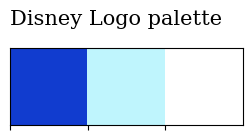

In [9]:
sns.palplot(['#113CCF', '#BFF5FD', '#FFFFFF'])

plt.title("Disney Logo palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [ ]:
df['country'].unique()


In [10]:
df['First Country'] = df['country'].apply(lambda x :x.split(',')[0])
                                          
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
                                          
df['Target ages'] = df['rating'].replace(ratings_ages)



In [11]:
df['listed_in']

2                           Animation, Comedy, Family
5                           Biographical, Documentary
9                             Comedy, Family, Musical
12                                Documentary, Family
19                            Comedy, Family, Fantasy
                            ...                      
1445        Action-Adventure, Family, Science Fiction
1446                 Action-Adventure, Comedy, Family
1447                      Biographical, Comedy, Drama
1448                     Buddy, Comedy, Coming of Age
1449    Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 818, dtype: object

In [12]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [ ]:
df['genre']

In [13]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio['Movie']

type    1.0
Name: Movie, dtype: float64

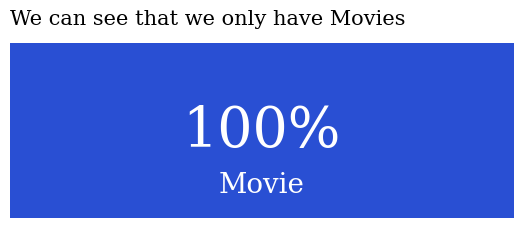

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#113CCF', alpha=0.9, label='Male')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

ax.annotate(f"{int(mf_ratio['Movie']*100)}%", 
                   xy=(mf_ratio['Movie']/2, 0),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')


ax.annotate("Movie", 
                   xy=(mf_ratio['Movie']/2, -0.25),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,0.92,'We can see that we only have Movies',fontfamily='serif',fontsize=15)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

In [15]:
df['First Country'].value_counts()

First Country
United States           747
United Kingdom           32
Canada                   20
France                    5
Australia                 3
Austria                   2
China                     2
Ireland                   1
United Arab Emirates      1
Germany                   1
Tanzania                  1
Denmark                   1
Norway                    1
New Zealand               1
Name: count, dtype: int64

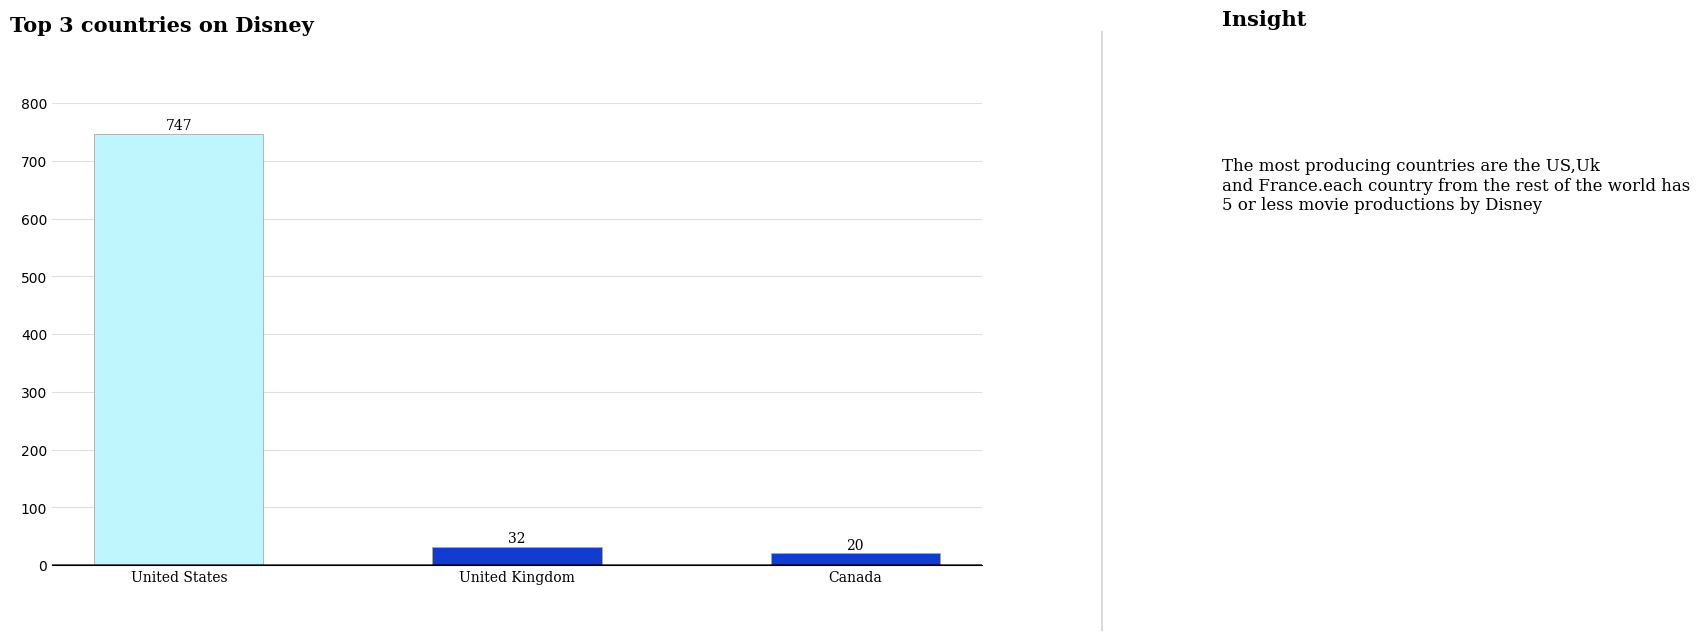

In [16]:
df['count'] = 1
data = df.groupby('First Country')['count'].sum().sort_values(ascending=False)[:3]

# Plot

color_map = ['#113CCF' for _ in range(3)]
color_map[0] = '#BFF5FD' # color highlight


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 15),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

fig.text(0.09, 1, 'Top 3 countries on Disney', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(1.1, 0.67, '''
The most producing countries are the US,Uk
and France.each country from the rest of the world has 
5 or less movie productions by Disney
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   


grid_y_ticks = np.arange(0, 900,100)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

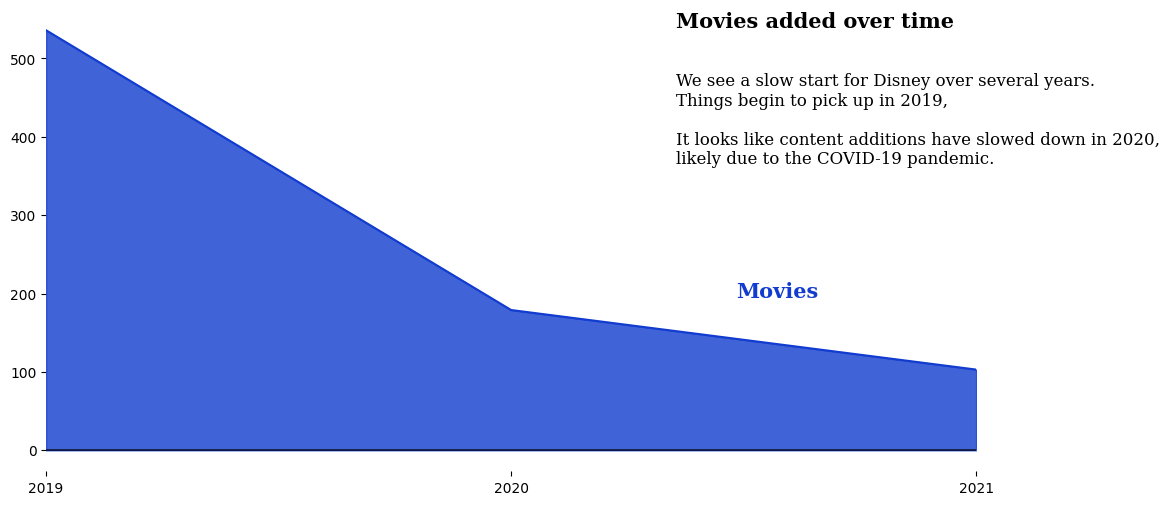

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = "#113CCF"


mtv_rel = df['year_added'].value_counts().sort_index()
ax.plot(mtv_rel.index, mtv_rel, color=color, label='Movie')
ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color, alpha=0.8)
    
grid_x_ticks = np.arange(2019, 2022,1)
ax.set_xticks(grid_x_ticks)
ax.set_axisbelow(True)
#ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2019,2021)


fig.text(0.65, 0.85, 'Movies added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.65, 0.59, 
'''We see a slow start for Disney over several years. 
Things begin to pick up in 2019,

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
''', fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.7,0.4,"Movies", fontweight="bold", fontfamily='serif', fontsize=15, color='#113CCF')
plt.show()


In [19]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

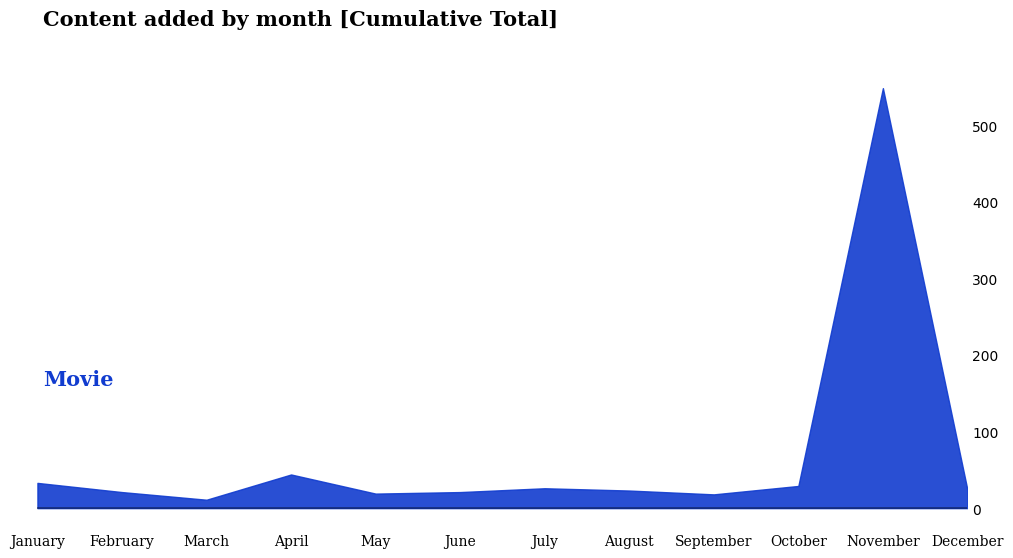

In [20]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['Movie']].cumsum(axis=0).T


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#113CCF', '#BFF5FD']


mtv_rel = data_sub['Movie']
ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[0], label='Movie',alpha=0.9)


ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)


for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.35,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color[0])


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [21]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#113CCF', '#BFF5FD', '#FFFFFF'])

In [22]:
np.bool = np.bool_


In [23]:
def genre_heatmap(df, title):
    
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Disney {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 32 types in the Disney Movie Dataset


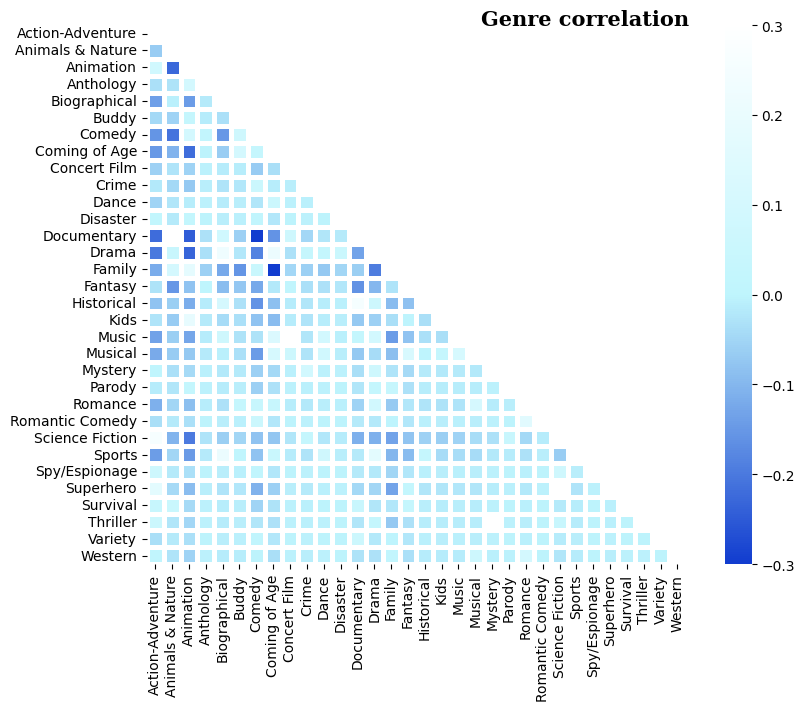

In [24]:
genre_heatmap(df, 'Movie')
plt.show()

In [46]:
data = df.groupby('First Country')['count'].sum().sort_values(ascending=False).reset_index()[:3]

data = data['First Country']


df_heatmap = df.loc[df['First Country'].isin(data)]

In [47]:
df_heatmap

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,First Country,Target ages,genre,count
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021,United States,Kids,"[Animation, Comedy, Family]",1
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021,United States,Teens,"[Biographical, Documentary]",1
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...,11,November,2021,United States,Kids,"[Comedy, Family, Musical]",1
12,s13,Movie,The Pixar Story,Leslie Iwerks,"Stacy Keach, John Lasseter, Brad Bird, John Mu...",United States,2021-11-19,2007,G,91 min,"Documentary, Family",A groundbreaking company forever changes the f...,11,November,2021,United States,Kids,"[Documentary, Family]",1
19,s20,Movie,Enchanted,Kevin Lima,"Amy Adams, Patrick Dempsey, James Marsden, Tim...",United States,2021-11-12,2007,PG,110 min,"Comedy, Family, Fantasy",An animated princess winds up in the real worl...,11,November,2021,United States,Older Kids,"[Comedy, Family, Fantasy]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,6,June,2021,United States,Teens,"[Action-Adventure, Family, Science Fiction]",1
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,4,April,2021,United States,Older Kids,"[Action-Adventure, Comedy, Family]",1
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",12,December,2020,United Kingdom,Teens,"[Biographical, Comedy, Drama]",1
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,9,September,2020,United Kingdom,Teens,"[Buddy, Comedy, Coming of Age]",1


In [51]:
df_heatmap = pd.crosstab(df_heatmap['First Country'],df_heatmap['Target ages'],normalize = "index").T

df_heatmap

First Country,Canada,United Kingdom,United States
Target ages,,,
Kids,0.70,0.25000,0.475234
Older Kids,0.25,0.65625,0.425703
Teens,0.05,0.09375,0.099063


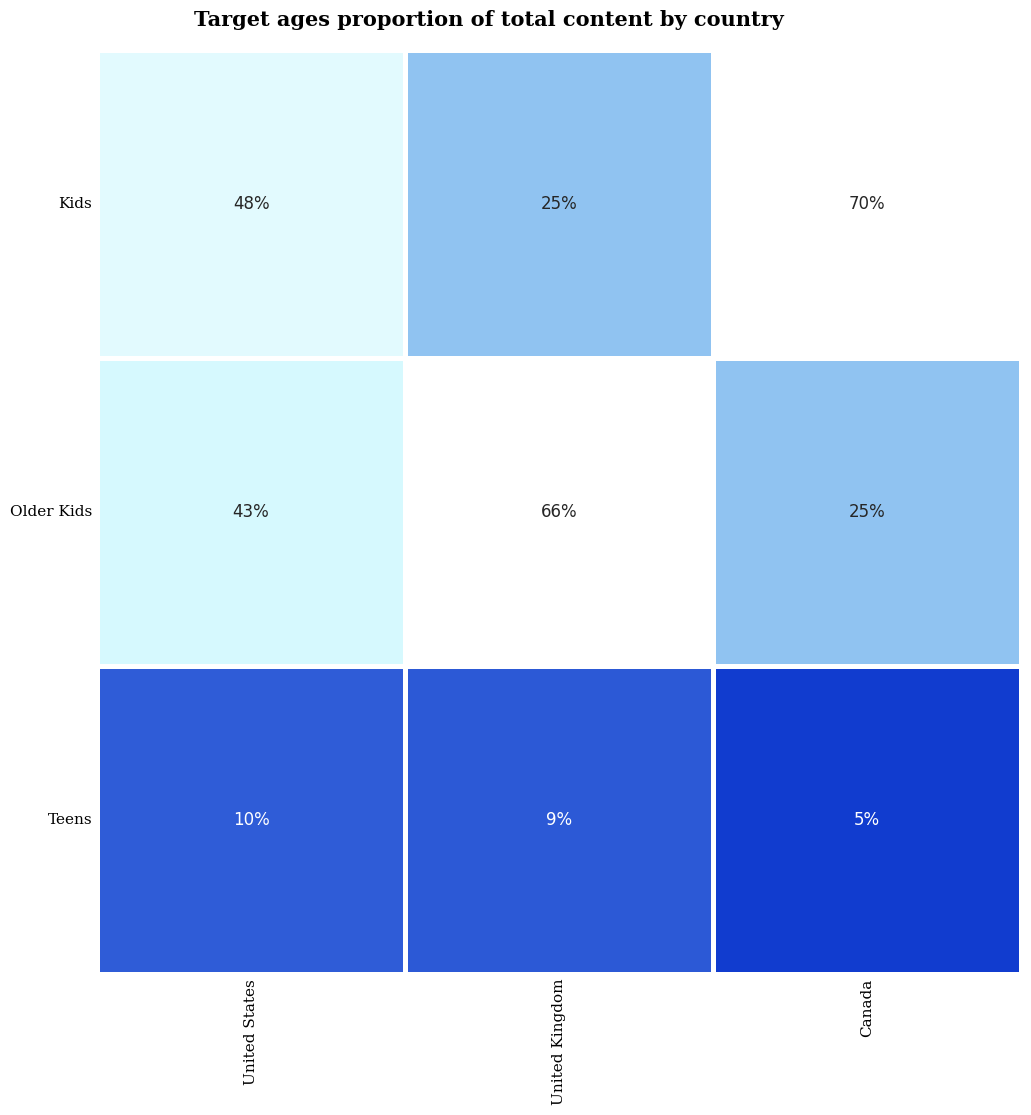

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
age_order = ['Kids','Older Kids','Teens']
country_order =['United States','United Kingdom','Canada']
sns.heatmap(df_heatmap.loc[age_order,country_order],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})


fig.text(.7, .9, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')

ax.tick_params(axis=u'both', which=u'both',length=0)

#plt.tight_layout()
plt.show()


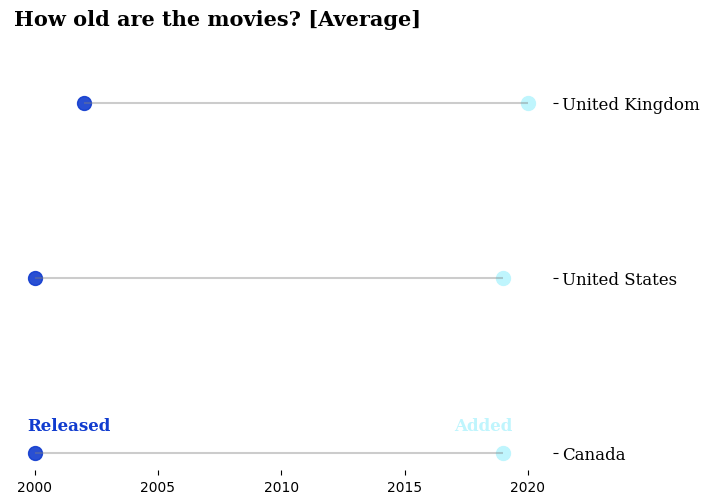

In [89]:
data = df.groupby('First Country')['count'].sum().sort_values(ascending=False).reset_index()[:3]

data = data['First Country']
df_loli = df.loc[df['First Country'].isin(data)]

loli = df_loli.groupby('First Country')[['release_year','year_added']].mean().round()

ordered_df = loli.sort_values(by='release_year')
ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.text(0.13, 1, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')

plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#113CCF',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#BFF5FD',s=100, alpha=1 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

grid_x_ticks = np.arange(2000 ,2025,5)
ax.set_xticks(grid_x_ticks)


# Custome legend
fig.text(0.15,0.19,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#113CCF')
fig.text(0.76,0.19,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#BFF5FD')


plt.show()

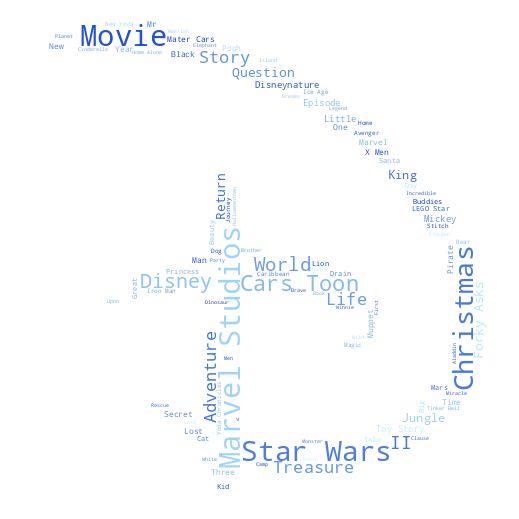

In [99]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#113CCF', '#BFF5FD'])

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/kaggle/input/disney-icon2/pngegg.png'))
mask = np.where(mask < 128, 255, 0).astype(np.uint8)


wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
